## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pandas import read_csv as rcsv

from pathlib import Path

# imports for supplemental processing & visualization
from pandas import DataFrame as wdf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = rcsv(
    Path('Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 1 alternative: Set the index to the column "Date"
Initial instructions in MD text states, 'Set the DatetimeIndex as the Timestamp column'
Subsequent instructions in code block, '# Set the index to the column "Date" '

In [3]:
# alternative approach to index value
# Set the index to the column "Date"
bitstamp_index_date = rcsv(
    Path('Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)
bitstamp_index_date.index.names = ['Date']

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
print('head function: first five rows of bitstamp dataframe-')
display(bitstamp.head())
print('\n')
print('tail function: last five rows of dataframe-')
display(bitstamp.tail())

head function: first five rows of bitstamp dataframe-


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329




tail function: last five rows of dataframe-


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `coinbase.csv` file, and create a DataFrame called `coinbase`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = rcsv(
    Path('Resources/coinbase.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
print('head function: first five rows of coinbase dataframe-')
display(coinbase.head())
print('\n')
print('tail function: last five rows of dataframe-')
display(coinbase.tail())

head function: first five rows of coinbase dataframe-


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401




tail function: last five rows of dataframe-


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.  -bitstamp

In [7]:
# identify data types
display(bitstamp.dtypes)

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [8]:
# quantify presence of NaN values in bitstamp dataframe
display(bitstamp.isnull().sum())
print('\n')
print('average content of NaN values per column:')
display(bitstamp.isnull().mean())
print('\n')
display(bitstamp.isnull())

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64



average content of NaN values per column:


Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,False,False,False,False,False,False,False
2018-01-01 00:01:00,False,False,False,False,False,False,False
2018-01-01 00:02:00,False,False,False,False,False,False,False
2018-01-01 00:03:00,False,False,False,False,False,False,False
2018-01-01 00:04:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,False,False,False,False,False,False,False
2018-03-31 23:56:00,False,False,False,False,False,False,False
2018-03-31 23:57:00,False,False,False,False,False,False,False


In [9]:
# For the bitstamp DataFrame, drop all NaNs or missing values in the DataFrame
print('there are no remaining NaN type values')
bitstamp_drop_na = bitstamp.dropna()
display(bitstamp_drop_na.isnull().sum())
print('\n')
display(bitstamp_drop_na.isnull().mean())

there are no remaining NaN type values


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

Open              0.0
High              0.0
Low               0.0
Close             0.0
BTC Volume        0.0
USD Volume        0.0
Weighted Price    0.0
dtype: float64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_drop_na.loc[:, 'Close'] = bitstamp_drop_na.loc[:, 'Close'].str.replace('$', '')
display(bitstamp_drop_na.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float

bitstamp_drop_na.loc[:, 'Close'] = bitstamp_drop_na.loc[:, 'Close'].astype('float')
display(bitstamp_drop_na.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary

display(bitstamp_drop_na.duplicated().sum())

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.  -coinbase

In [13]:
# identify data types
display(coinbase.dtypes)

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [14]:
# quantify presence of NaN values in coinbase dataframe
display(coinbase.isnull().sum())
print('\n')
print('average content of NaN values per column:')
display(coinbase.isnull().mean())
print('\n')
display(coinbase.isnull())

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64



average content of NaN values per column:


Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,False,False,False,False,False,False,False
2018-01-01 00:01:00,False,False,False,False,False,False,False
2018-01-01 00:02:00,False,False,False,False,False,False,False
2018-01-01 00:03:00,False,False,False,False,False,False,False
2018-01-01 00:04:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,False,False,False,False,False,False,False
2018-03-31 23:56:00,False,False,False,False,False,False,False
2018-03-31 23:57:00,False,False,False,False,False,False,False


In [15]:
# For the coinbase DataFrame, drop all NaNs or missing values in the DataFrame
coinbase_drop_na = coinbase.dropna()
print('there are no remaining NaN type values')
display(coinbase_drop_na.isnull().sum())
print('\n')
display(coinbase_drop_na.isnull().mean())

there are no remaining NaN type values


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

Open              0.0
High              0.0
Low               0.0
Close             0.0
BTC Volume        0.0
USD Volume        0.0
Weighted Price    0.0
dtype: float64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column. -coinbase

In [16]:
# Use the str.replace function to remove the dollar sign, $

coinbase_drop_na.loc[:, 'Close'] = coinbase_drop_na.loc[:, 'Close'].str.replace('$', '')
display(coinbase_drop_na.head())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


### Step 3: Convert the data type of the Close column to a `float`. -coinbase

In [17]:
# Convert the Close data type to a float

coinbase_drop_na.loc[:, 'Close'] = coinbase_drop_na.loc[:, 'Close'].astype('float')
display(coinbase_drop_na.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary. -coinbase

In [18]:
# Review the data for duplicate values, and drop them if necessary

display(coinbase_drop_na.duplicated().sum())

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Slicing a smaller dataframe from the larger whole
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_sliced = bitstamp_drop_na.loc[:,['Close']]      
# Review the first five rows of the DataFrame
display(bitstamp_sliced.head())

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [20]:
# Slicing a smaller dataframe from the larger whole
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

coinbase_sliced = coinbase_drop_na.loc[:,['Close']] 

# Review the first five rows of the DataFrame
display(coinbase_sliced.head())

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
display(bitstamp_sliced.describe())  

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [22]:
# Generate the summary statistics for the coinbase DataFrame
display(coinbase_sliced.describe())

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


## Comparisons of pricing between the exchanges

bitstamp count 129067 < coinbase count 129322

bitstamp mean 10459.84 > coinbase mean 10449.14

bitstamp 50% 10145.95 > coinbase 50% 10137.44

bitstamp std 2315.98 < coinbase std 2317.20

bitstamp min 5944 > coinbase min 5882.31

bitstamp max 17234.98 > coinbase max 17177.99

Demonstrating that overall bitsamp prices were hirer than coindbase.

<AxesSubplot:title={'center':'BTC bitstamp'}, xlabel='Timestamp'>

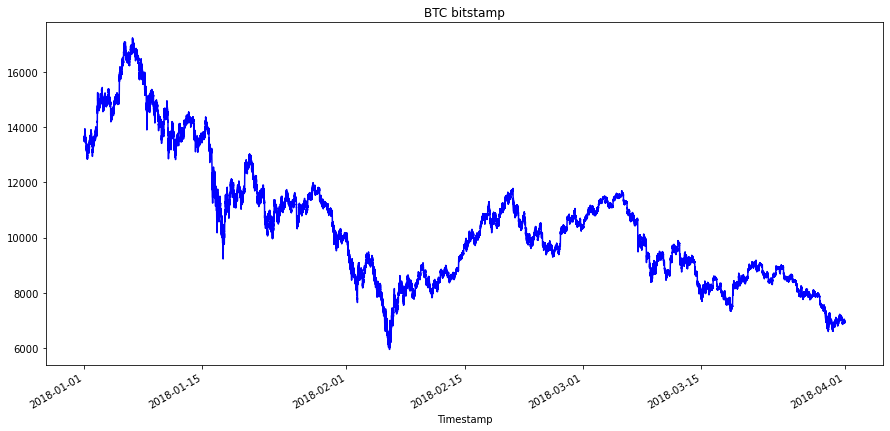

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced['Close'].plot(figsize=(15, 7), title='BTC bitstamp', color='blue')

<AxesSubplot:title={'center':'BTC coinbase'}, xlabel='Timestamp'>

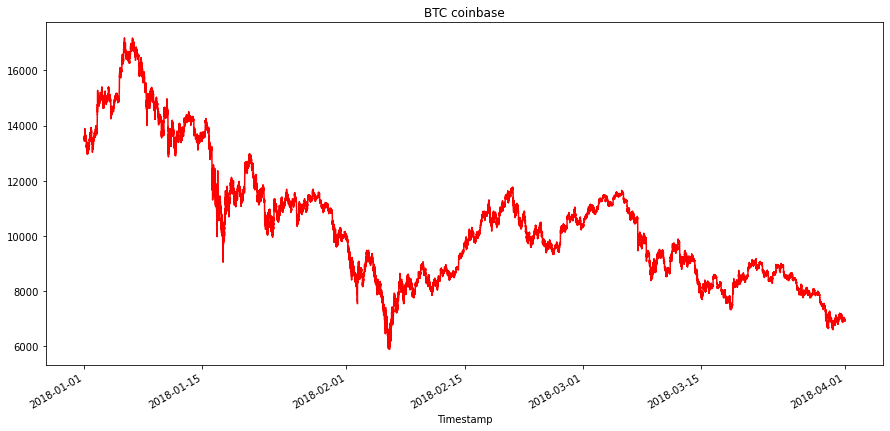

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced['Close'].plot(figsize=(15, 7), title='BTC coinbase', color='red')

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2'}, xlabel='Timestamp'>

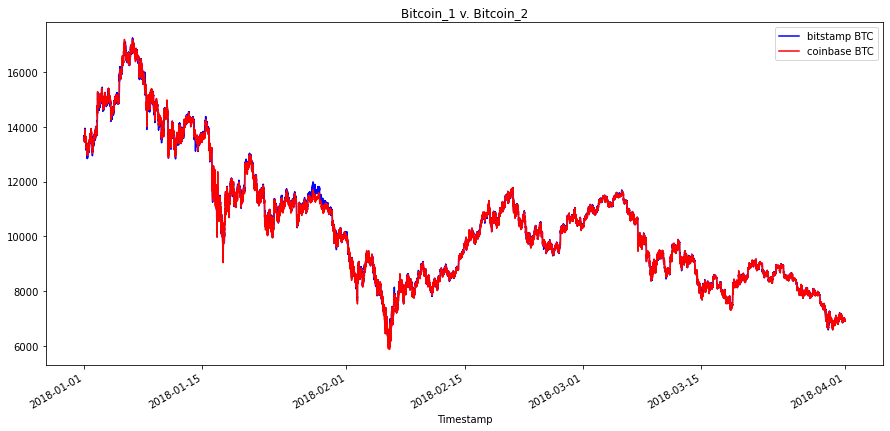

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitcoin_1 = bitstamp_sliced
bitcoin_2 = coinbase_sliced
bitcoin_1['Close'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2', color='red', label='coinbase BTC')

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2 - January'}, xlabel='Timestamp'>

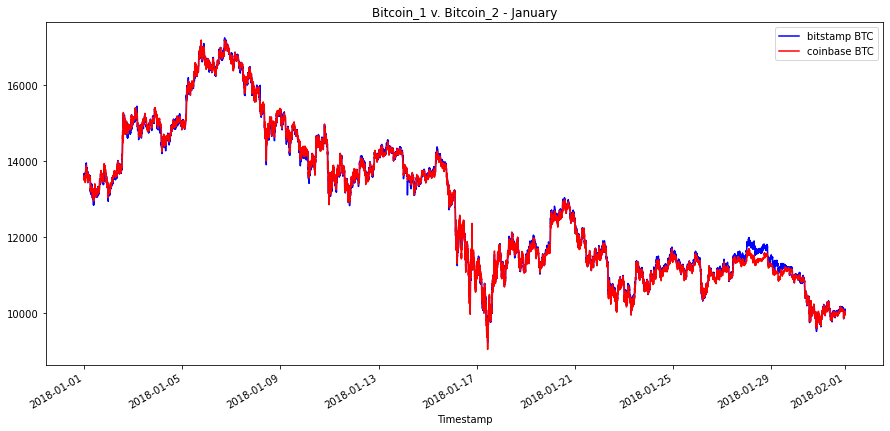

In [26]:
# Early month of dataset
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitcoin_1['Close'].loc['2018-01'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - January', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].loc['2018-01'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - January', color='red', label='coinbase BTC')

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2 - March'}, xlabel='Timestamp'>

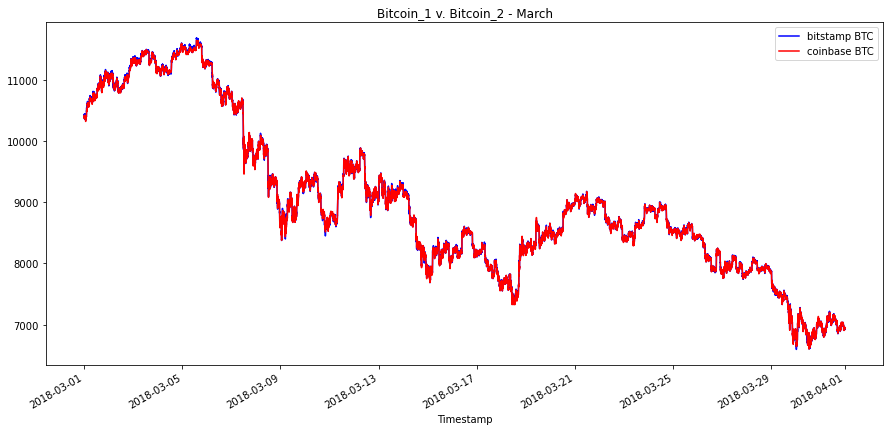

In [27]:
# Later month of dataset
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitcoin_1['Close'].loc['2018-03'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - March', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].loc['2018-03'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - March', color='red', label='coinbase BTC')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** given a period of January 2018 through March 2018 and comparing January to March, while subtle there is clearly a bit more degree of spread in January as opposed to March.  This is actually most pronounced from January 26 through the 30th.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

ANSWER: As I compare the data, it becomes apparent that magnitude of arbitrage opportunities, quantity of arbitrage opportunities, consistency/frequency of opportunities within a timframe, and ultimately absolute number of arbitrage opportunities ALL markedly and dramatically decrease.

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2 - Early'}, xlabel='Timestamp'>

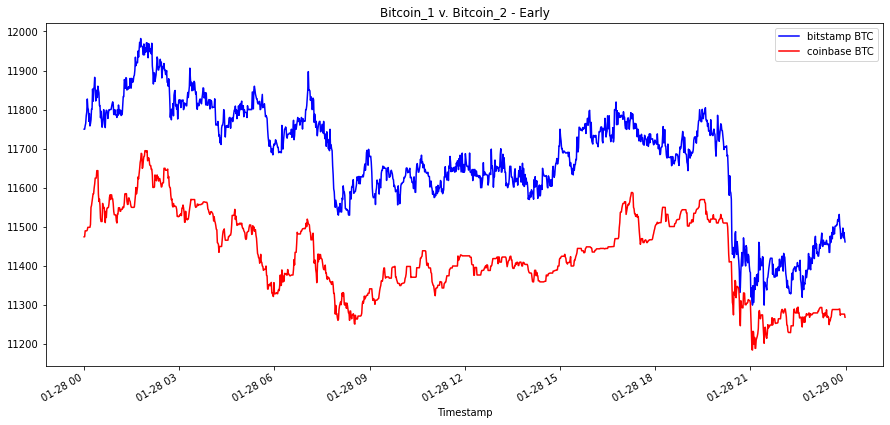

In [28]:
# Early
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitcoin_1['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Early', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].loc['2018-01-28'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Early', color='red', label='coinbase BTC')

In [29]:
# Early
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitcoin_1['Close'].loc['2018-01-28'] - bitcoin_2['Close'].loc['2018-01-28']

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_early.describe())

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'arbitrage_spread_early'}>

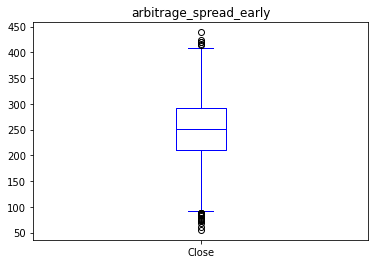

In [30]:
# Early
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title='arbitrage_spread_early', color='blue')

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2 - Middle'}, xlabel='Timestamp'>

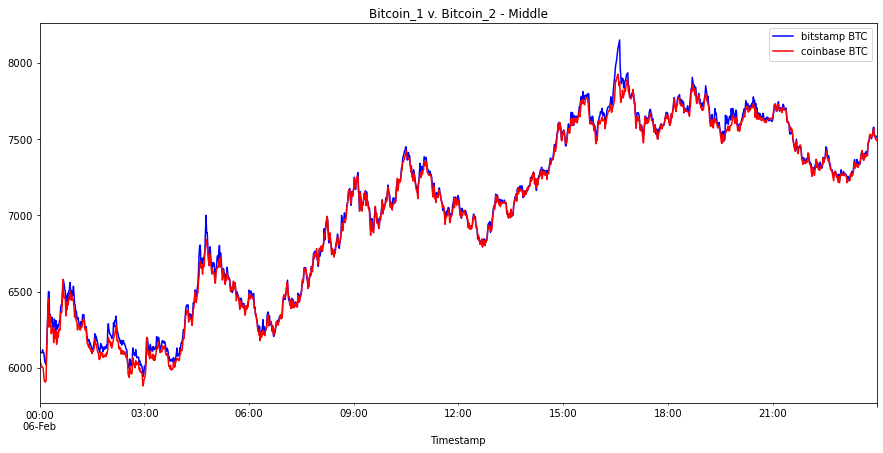

In [31]:
# Middle
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitcoin_1['Close'].loc['2018-02-06'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Middle', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].loc['2018-02-06'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Middle', color='red', label='coinbase BTC')

In [32]:
# Middle
# Using the middle date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitcoin_1['Close'].loc['2018-02-06'] - bitcoin_2['Close'].loc['2018-02-06']

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_middle.describe())

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'arbitrage_spread_middle'}>

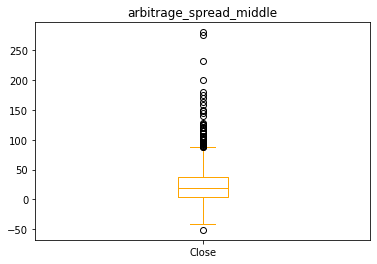

In [33]:
# Middle
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title='arbitrage_spread_middle', color='orange')

<AxesSubplot:title={'center':'Bitcoin_1 v. Bitcoin_2 - Late'}, xlabel='Timestamp'>

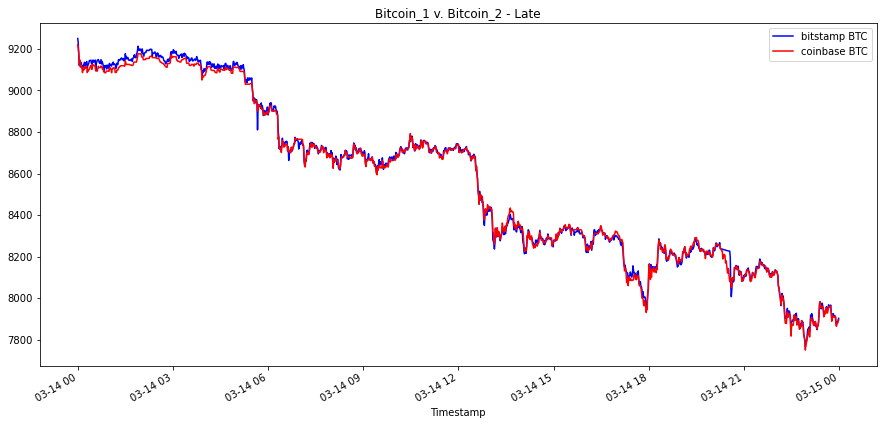

In [34]:
# Late
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitcoin_1['Close'].loc['2018-03-14'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Late', color='blue', label='bitstamp BTC')
bitcoin_2['Close'].loc['2018-03-14'].plot(legend=True, figsize=(15, 7), title='Bitcoin_1 v. Bitcoin_2 - Late', color='red', label='coinbase BTC')

In [35]:
# Late
# Using the middle date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitcoin_1['Close'].loc['2018-03-14'] - bitcoin_2['Close'].loc['2018-03-14']

# Generate summary statistics for the early DataFrame
display(arbitrage_spread_late.describe())

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'arbitrage_spread_late'}>

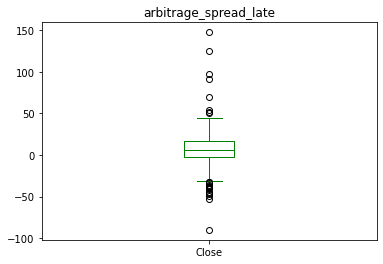

In [36]:
# Late
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title='arbitrage_spread_late', color='green')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

ANSWER: examining the three days accross the three time periods I observe - during day from the early time period, there is large, consistent, and persistent arbitrage spread throughout the day.  As we examine the day in the middle timeframe, i see there appears to be intermittent or burst type arbitrage opportunities with pauses inbetween.  Furthermore, the pauses appear to tend toward increased duration while the bursts tend toward decrease magnitude as the day proresses.  Finally, the day observed in the late timeframe has so few arbitrage opportunities as making a specific pattern observation would be unreliable.  what is notable is that the few trade opportunities occur toward end of the day.

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [37]:
# Early
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitcoin_1['Close'].loc['2018-01-28'] - bitcoin_2['Close'].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_trades_early = arbitrage_spread_early[arbitrage_spread_early > 0]
display(positive_trades_early.describe())

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [38]:
# Middle
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitcoin_1['Close'].loc['2018-02-06'] - bitcoin_2['Close'].loc['2018-02-06']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_trades_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
display(positive_trades_middle.describe())

count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

In [39]:
# Late
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitcoin_1['Close'].loc['2018-03-14'] - bitcoin_2['Close'].loc['2018-03-14']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
positive_trades_late = arbitrage_spread_late[arbitrage_spread_late > 0]
display(positive_trades_late.describe())

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [40]:
# Early
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = positive_trades_early / bitcoin_2['Close'].loc['2018-01-28']

# Review the spread return DataFrame
display(spread_return_early.head())
display(spread_return_early.sum())

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

31.086004856931776

In [41]:
# Middle
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = positive_trades_middle / bitcoin_2['Close'].loc['2018-02-06']

# Review the spread return DataFrame
display(spread_return_middle.head())
display(spread_return_middle.sum())

Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:01:00    0.009950
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
Name: Close, dtype: float64

5.402103689182268

In [42]:
# Late
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = positive_trades_late / bitcoin_2['Close'].loc['2018-03-14']

# Review the spread return DataFrame
display(spread_return_late.head())
display(spread_return_late.sum())

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
Name: Close, dtype: float64

1.619274521342895

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [43]:
# Early
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_early.sum())

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

30.592526118932792

In [44]:
# Middle
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
display(profitable_trades_middle.head())
display(profitable_trades_middle.sum())

Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
2018-02-06 00:05:00    0.019154
Name: Close, dtype: float64

1.5743407649364056

In [45]:
# Late
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
display(profitable_trades_late.head())
display(profitable_trades_late.sum())

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

0.057082194580561046

#### 4. Generate the summary statistics of your spread returns that are greater than 1%.  How do the average returns compare among the three dates?

### answer - the number of days in which profitable arbitrage is possible rapidly decreases from early in the dataset toward late in the dataset.  Furthermore, the actual number of profitable arbitrage opportunities in a given day markedly decreased as you progress from early in the dataset toward late.  ultimately, what we see is extremely large arbitrage opportunity early progress toward a healthy but markedly smaller opportunity in the middle and as we reach the begining of the late period arbitrage opportunity is all but gone with only a single day with a couple trade opportunities. In short, the profitable timeframe (i.e. number of days), the number of trades, and the size / value of trades all decreased as progress from early to middle to late.  Finally, the further you progress from early the more numerous we see actual reversal in relative pricing between exchanges. All of these factors are consistent with 'correction' or equalization of prices between the two exchanges.  

In [46]:
# Early
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [47]:
# Middle
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_middle.describe())

count    110.000000
mean       0.014312
std        0.005292
min        0.010084
25%        0.010822
50%        0.012209
75%        0.015809
max        0.036984
Name: Close, dtype: float64

In [48]:
# Late
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_late.describe())

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [49]:
# Early
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitcoin_2['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_early.tail())

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

Timestamp
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, dtype: float64

In [50]:
# Middle
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitcoin_2['Close'].loc['2018-02-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()
# View the early profit DataFrame
display(profit_per_trade_middle.head())
display(profit_per_trade_middle.tail())

Timestamp
2018-02-06 00:00:00     61.12
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
Name: Close, dtype: float64

Timestamp
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, dtype: float64

In [51]:
# Late
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitcoin_2['Close'].loc['2018-03-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()
# View the early profit DataFrame
display(profit_per_trade_late.head())
display(profit_per_trade_late.tail())

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [52]:
# Early
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

In [53]:
# Middle
# Generate the summary statistics for the middle profit per trade DataFrame
display(profit_per_trade_middle.describe())

count    110.000000
mean      94.872545
std       41.169942
min       61.120000
25%       68.205000
50%       80.010000
75%      106.697500
max      280.010000
Name: Close, dtype: float64

In [54]:
# Late
# Generate the summary statistics for the middle profit per trade DataFrame
display(profit_per_trade_late.describe())

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Early Profits'}, xlabel='Timestamp'>

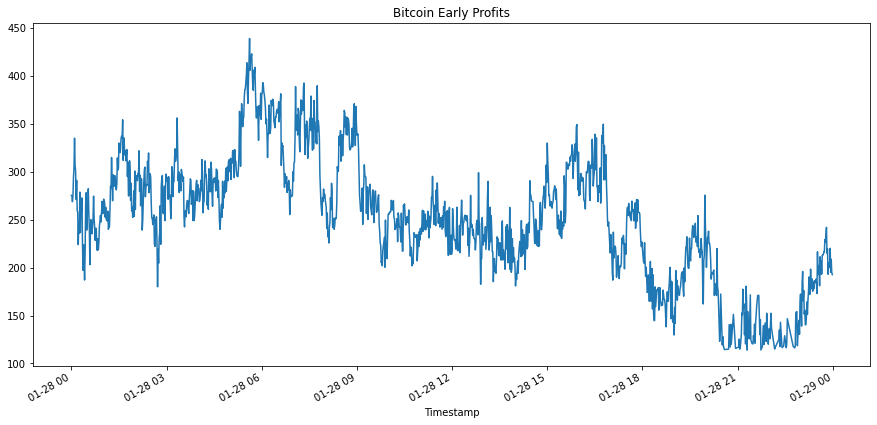

In [55]:
# Early
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(15, 7), title="Bitcoin Early Profits")

<AxesSubplot:title={'center':'Bitcoin Middle Profits'}, xlabel='Timestamp'>

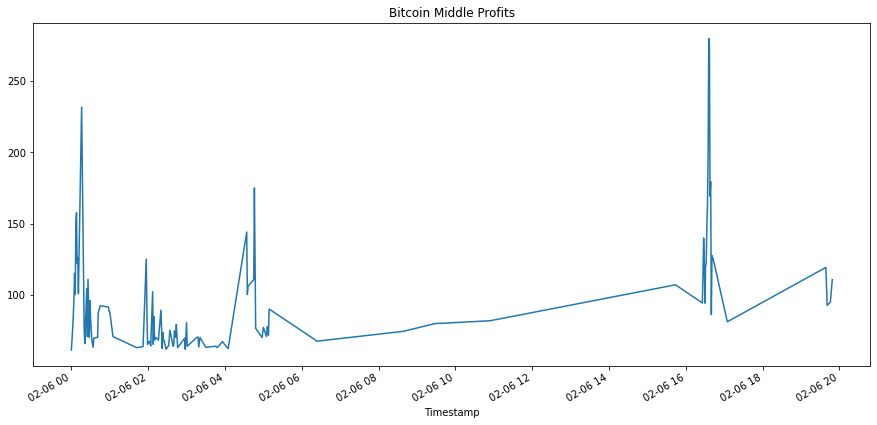

In [56]:
# Middle
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(15, 7), title='Bitcoin Middle Profits')

<AxesSubplot:title={'center':'Bitcoin Late Profits'}, xlabel='Timestamp'>

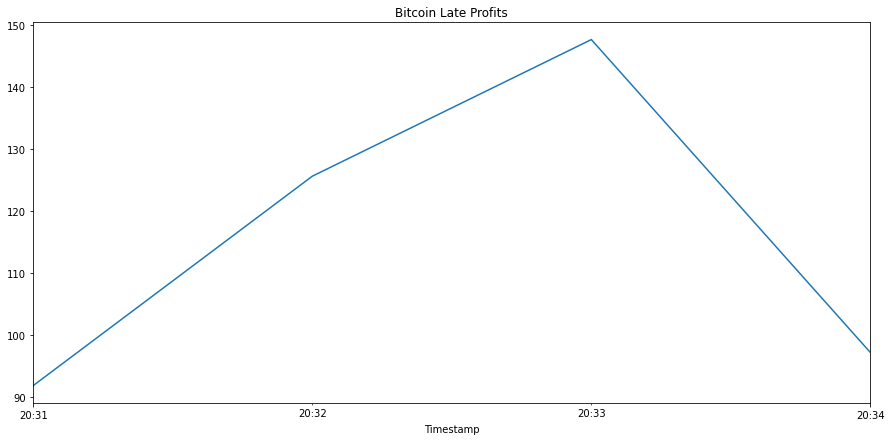

In [57]:
# Late
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_late.plot(figsize=(15, 7), title='Bitcoin Late Profits')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [58]:
# Early
# Calculate the sum of the potential profits for the early profit per trade DataFrame
display(profit_per_trade_early.sum())

349918.2900000001

In [59]:
# Middle - A
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
display(profit_per_trade_middle.sum())

10435.979999999996

In [60]:
# Middle
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
display(profit_per_trade_late.sum())

462.3899999999976

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [61]:
# Early
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Early Profits'}, xlabel='Timestamp'>

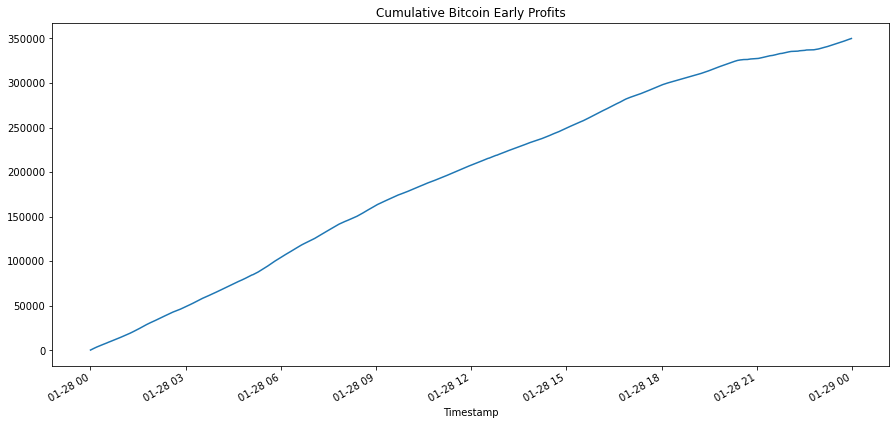

In [62]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 7), title='Cumulative Bitcoin Early Profits')

In [63]:
# Middle
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Middle Profits'}, xlabel='Timestamp'>

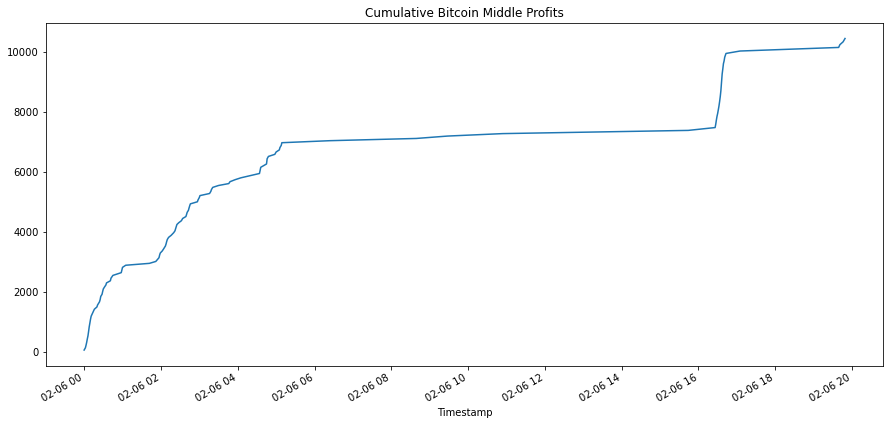

In [64]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(15, 7), title='Cumulative Bitcoin Middle Profits')

In [65]:
# Late
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Late Profits'}, xlabel='Timestamp'>

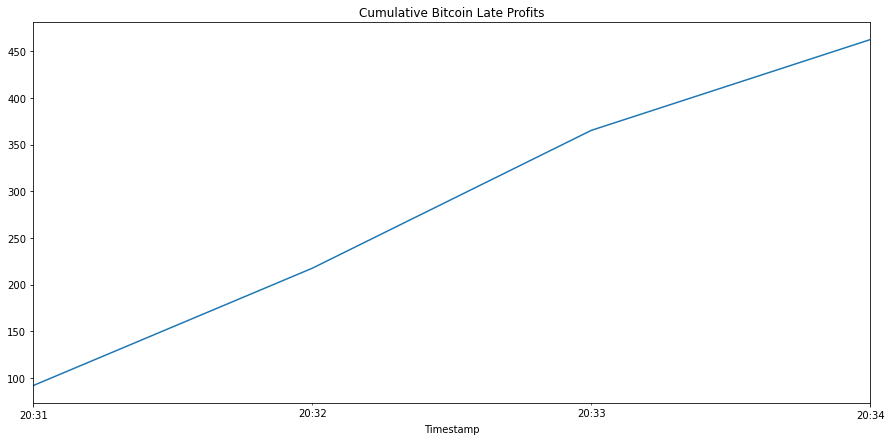

In [66]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(15, 7), title='Cumulative Bitcoin Late Profits')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The data and accompanying plots demonstrate the gross magnitude and duration of arbitrage opportunities on three specific days during the 3 months.  It is generally apparent that both the magnitude and duration of intraday arbitrage trading opportunities significantly decreased from the early, middle, and late periods, showing an effective equalization in pricing between the two exchanges examined and thus loss of further arbitrage opportunities.  If one examines the specific line plots of each intraday arbitrage period when overlayed, examination of the shape or morphology of the different periods, early, middle, and late.  The early demonstrates a steady and consistent LINEAR trading morphology.  The middle shows burst periods followed by pauses which lengthen and/or coincide with subsequent bursts being diminished.  Finally, the late, at first glance may appear consistent and linear.  However, when taking into account how few are the trading opportunities over a markedly short trading period, one understands is grossly flat throughout the day with an apparent minimal burst opportunity which is generally consistent and demonstrated within the more granular analysis.

## Analysis Report

## Supplemental Process & Visualize

In [67]:
# Instead of Drop NaNs (i.e. code blocks 48, 49, and 50), replace any missing values from the profit DataFrames with 0
profit_per_trade_early = profit_early.fillna(0)
profit_per_trade_middle = profit_middle.fillna(0)
profit_per_trade_late = profit_late.fillna(0)

In [68]:
# Use the cumsum function to calculate the cumulative profits over time for the early, middle, late DataFrames

cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits'}, xlabel='Timestamp'>

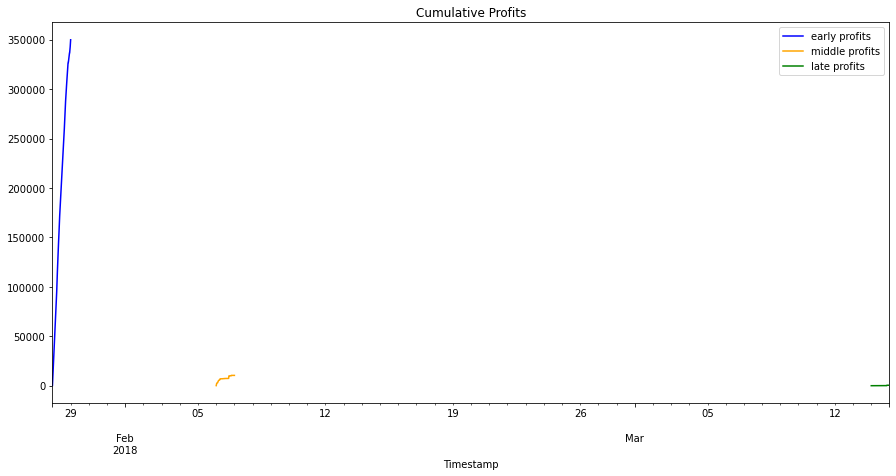

In [69]:
# Plot the cumulative sum of profits for the early, middle, late profit per trade DataFrame
cumulative_profit_early.plot(legend=True, figsize=(15, 7), title='Cumulative Profits', color='blue', label='early profits')
cumulative_profit_middle.plot(legend=True, figsize=(15, 7), title='Cumulative Profits', color='orange', label='middle profits')
cumulative_profit_late.plot(legend=True, figsize=(15, 7), title='Cumulative Profits', color='green', label='late profits')

### In brief, this plot demonstrates the gross magnitude and duration of arbitrage opportunities on three specific days during the 3 months (i.e. blue, orange, & green).  It is generally apparent that both the magnitude and duration of intraday arbitrage trading opportunities significantly decreased from the early, middle, and late periods, showing an effective equalization in pricing between the two exchanges examined and thus loss of further arbitrage opportunities.

In [70]:
# eliminate Timestamp index
cumulative_profit_early = cumulative_profit_early.reset_index().drop(columns = 'Timestamp')
cumulative_profit_middle = cumulative_profit_middle.reset_index().drop(columns = 'Timestamp')
cumulative_profit_late = cumulative_profit_late.reset_index().drop(columns = 'Timestamp')

# combine (concatenate) early, middle, and late dataframes
profits_concat = pd.concat([cumulative_profit_early, cumulative_profit_middle, cumulative_profit_late], axis = 1)

In [71]:
display(profits_concat.head())
display(profits_concat.tail())

,Close,Close,Close
0,275.38,61.12,0.0
1,550.38,61.12,0.0
2,819.15,137.07,0.0
3,1094.18,222.06,0.0
4,1388.44,318.15,0.0


,Close,Close,Close
1435,349126.69,10435.98,462.39
1436,349321.80,10435.98,462.39
1437,349530.54,10435.98,462.39
1438,349725.66,10435.98,462.39
1439,349918.29,10435.98,462.39


In [72]:
# scale the columns of dataframe
scaler = MinMaxScaler()
profits_concat_scaled = scaler.fit_transform(profits_concat)

<AxesSubplot:title={'center':'relative consistency of profitable trades during three different days'}>

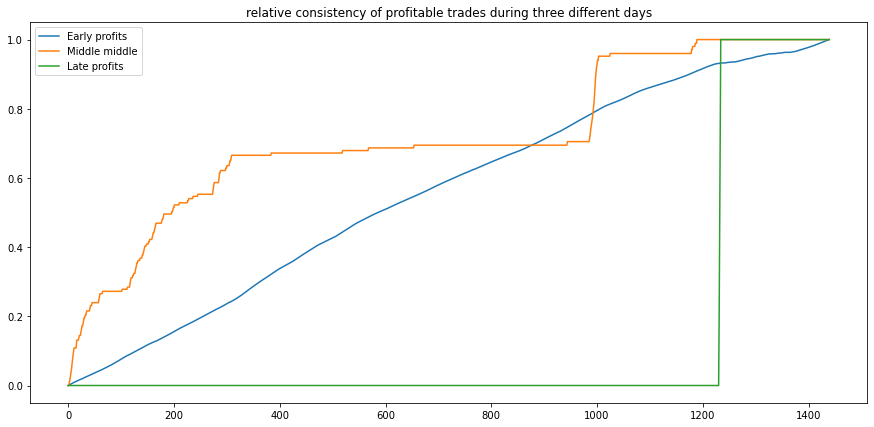

In [73]:
wdf(profits_concat_scaled, columns = ['Early profits', 'Middle middle', 'Late profits']).plot(figsize = (15,7), title='relative consistency of profitable trades during three different days')

### By utilizing MinMaxScaler, the specific line plots of each intraday arbitrage period have been overlayed.  This eliminates any overt sense of 'magnitude' comparisons between each day while enabling examination of the shape or morphology of the different periods, early, middle, and late.  The early demonstrates a steady and consistent linear trading morphology.  The middle shows burst periods followed by pauses which lengthen and/or coincide with subsequent bursts being diminished.  Finally, the late is grossly flat throughout the day with an apparent single burst opportunity which is generally consistent and demonstrated within the more granular analysis.

### Summary statistics

In [74]:
print('\n')
print('Summary profit per trade statistics early:')
print('\n')
display(profit_per_trade_early.describe())
print('\n')
print('cummulative sum profits per early timeframe:')
display(round(profit_per_trade_early.sum(), 2))
print('\n')
print('Summary profit per trade statistics middle:')
print('\n')
display(profit_per_trade_middle.describe())
print('\n')
print('cummulative sum profits per middle timeframe:')
display(round(profit_per_trade_middle.sum(), 2))
print('\n')
print('Summary profit per trade statistics late:')
print('\n')
display(profit_per_trade_late.describe())
print('\n')
print('cummulative sum profits per late timeframe:')
display(round(profit_per_trade_late.sum(), 2))



Summary profit per trade statistics early:




count    1440.000000
mean      242.998812
std        79.648327
min         0.000000
25%       209.375000
50%       251.110000
75%       290.712500
max       439.010000
Name: Close, dtype: float64



cummulative sum profits per early timeframe:


349918.29



Summary profit per trade statistics middle:




count    1440.000000
mean        7.247208
std        27.638178
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       280.010000
Name: Close, dtype: float64



cummulative sum profits per middle timeframe:


10435.98



Summary profit per trade statistics late:




count    1440.000000
mean        0.321104
std         6.200857
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       147.650000
Name: Close, dtype: float64



cummulative sum profits per late timeframe:


462.39